In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

df=pd.read_csv('cleaned_data.csv')
df.head(10)

,Unnamed: 0,Id,age,job,marital,education,credit_default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,1,1002,44.0,technician,single,secondary,no,29.0,yes,no,unknown,5,may,151,1,-1,0,unknown,no
1,2,1003,33.0,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
2,3,1004,47.0,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5,may,92,1,-1,0,unknown,no
3,4,1005,33.0,unknown,single,unknown,no,1.0,no,no,unknown,5,may,198,1,-1,0,unknown,no
4,5,1006,35.0,management,married,tertiary,no,231.0,yes,no,unknown,5,may,139,1,-1,0,unknown,no
5,6,1007,28.0,management,single,tertiary,no,447.0,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
6,10,1011,41.0,admin.,divorced,secondary,no,270.0,yes,no,unknown,5,may,222,1,-1,0,unknown,no
7,11,1012,29.0,admin.,single,secondary,no,390.0,yes,no,unknown,5,may,137,1,-1,0,unknown,no
8,12,1013,53.0,technician,married,secondary,no,6.0,yes,no,unknown,5,may,517,1,-1,0,unknown,no
9,13,1014,58.0,technician,married,unknown,no,71.0,yes,no,unknown,5,may,71,1,-1,0,unknown,no


# How balance is vary in each categories of y

In [2]:
y_balance=pd.DataFrame(df.groupby('y').sum()['balance'].reset_index())
y_balance

,y,balance
0,no,52043053.0
1,yes,9539305.0


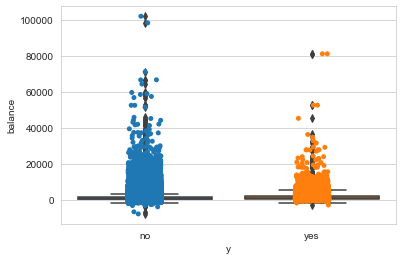

In [3]:
sns.set_style('whitegrid')
t=sns.boxplot(x='y',y='balance',data=df)
t=sns.stripplot(x='y',y='balance',data=df)

# Age variation in each category of y

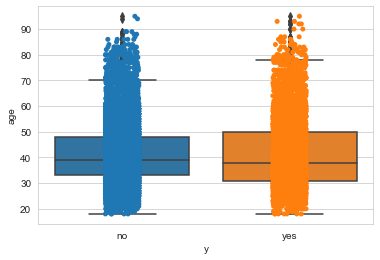

In [4]:
sns.set_style('whitegrid')
t=sns.boxplot(x='y',y='age',data=df)
t=sns.stripplot(x='y',y='age',data=df)

# Age variation of all clients

<AxesSubplot:>

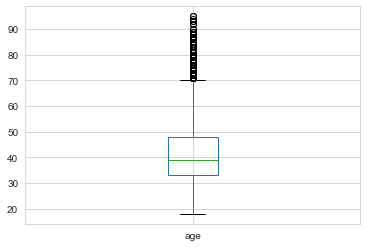

In [5]:
plot1=df.boxplot("age")
plot1

# variation of number of contact perform during the campaign 

Text(0.5, 1.0, 'simpla boxplot')

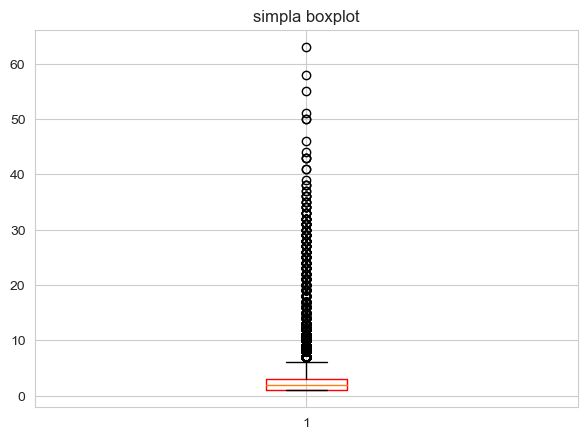

In [6]:
plt.rcParams.update({'figure.figsize':(7,5),'figure.dpi':100})
plt.boxplot(df['campaign'],boxprops=dict(color='red'))
plt.title('simpla boxplot')

In [7]:
contact_y = pd.DataFrame(df.groupby(['contact', 'y']).count()['Id'])

In [8]:
contact_y 

Id
contact   y         
cellular  no   24916
          yes   4366
telephone no    2516
          yes    390
unknown   no   12478
          yes    530

# What marital status has the highest number of clients having subscribed a term deposit

Text(0.5, 1.0, 'deposit Records')

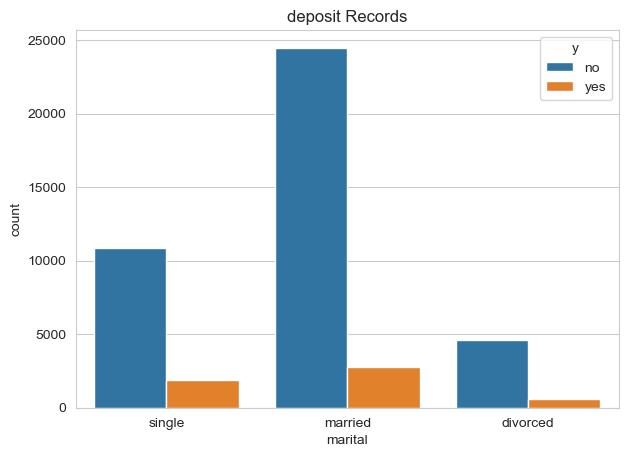

In [9]:
sns.countplot(x='marital', hue='y', data=df).set_title("deposit Records")

# Is most of clients are subscribed a term deposit

Text(0.5, 1.0, 'subscribed deposit')

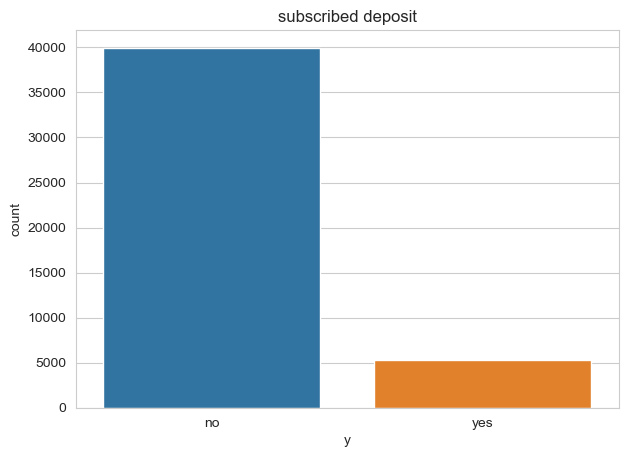

In [10]:
sns.countplot(x='y', data=df).set_title("subscribed deposit")

# What is the outcome of the previous marketing campaign for most of clients

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


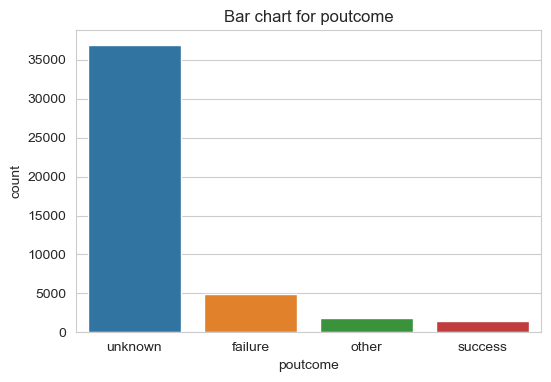

In [11]:
plt.figure(figsize=(6,4))
sns.countplot(df['poutcome']).set_title("Bar chart for poutcome")
plt.show()

# What are the contacts used by the clients frequently

In [12]:
contact_count=pd.DataFrame(df.groupby('contact').count()['Id'])
contact_count

,Id
contact,
cellular,29282
telephone,2906
unknown,13008


In [13]:
contact_count=contact_count.sort_values('Id',ascending=False)

In [14]:
contact_count[0:1]

,Id
contact,
cellular,29282


D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


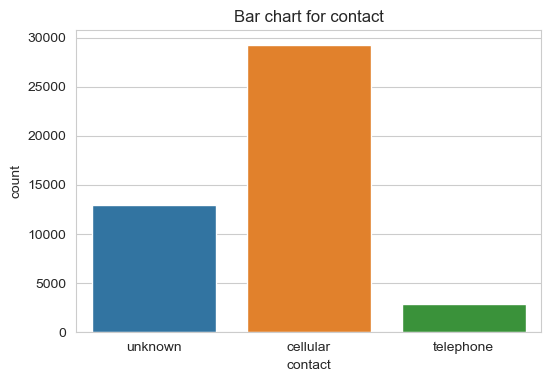

In [15]:
plt.figure(figsize=(6,4))
sns.countplot(df['contact']).set_title("Bar chart for contact")
plt.show()

# Are the clients having higher balance value in each job type subscribed a term deposit 

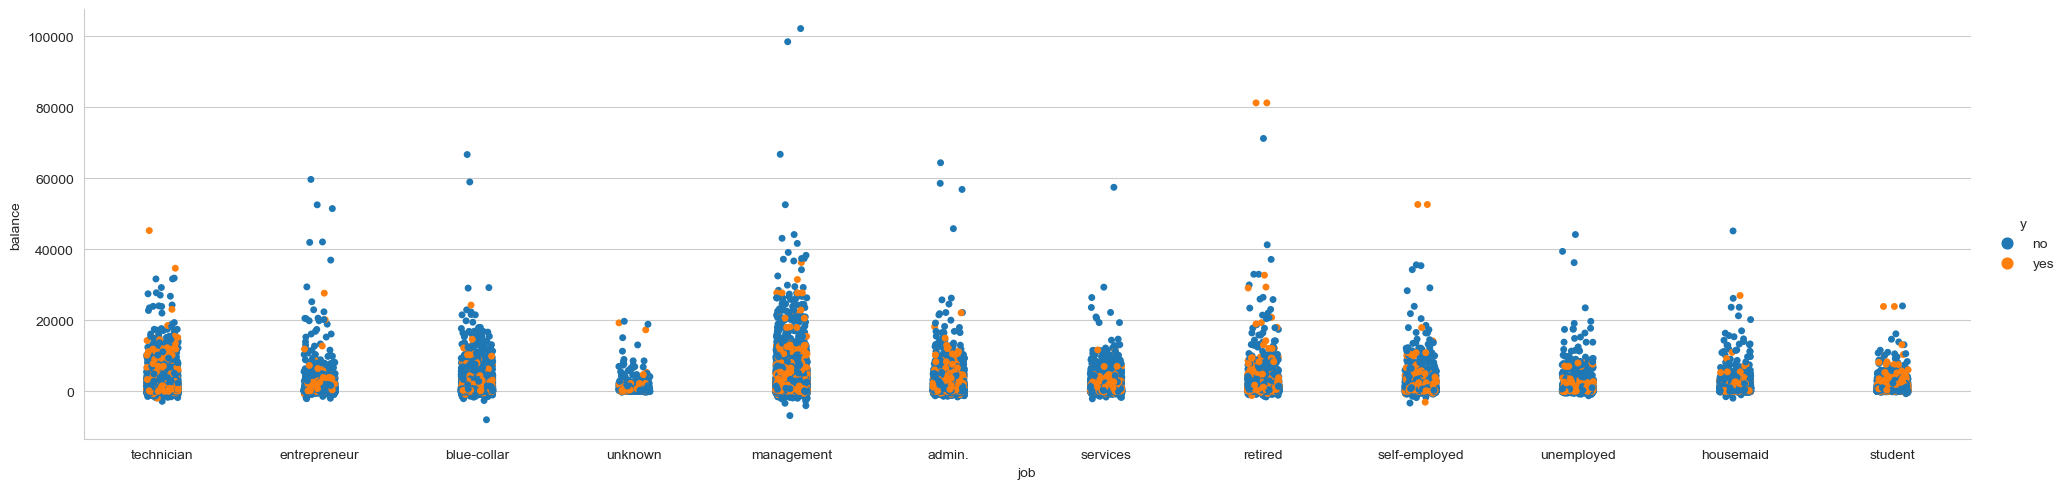

In [16]:
sns.catplot(x='job', y='balance', hue='y', data=df, aspect=4)

# What are the education levels of the client having more than 60000 euros and subscribed a term deposit

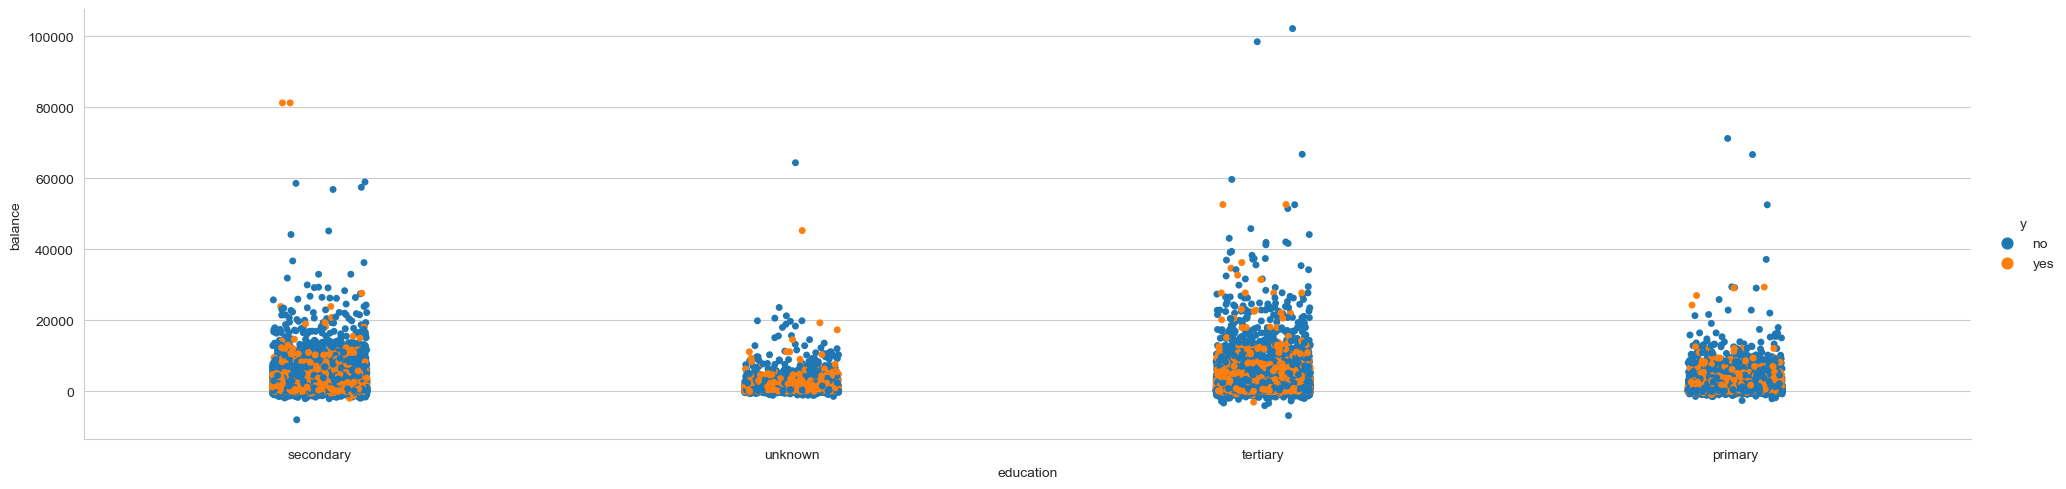

In [17]:
sns.catplot(x='education', y='balance', hue='y', data=df, aspect=4)

# Variation of total balance in each level of contact, job marital and education

<Figure size 700x500 with 0 Axes>

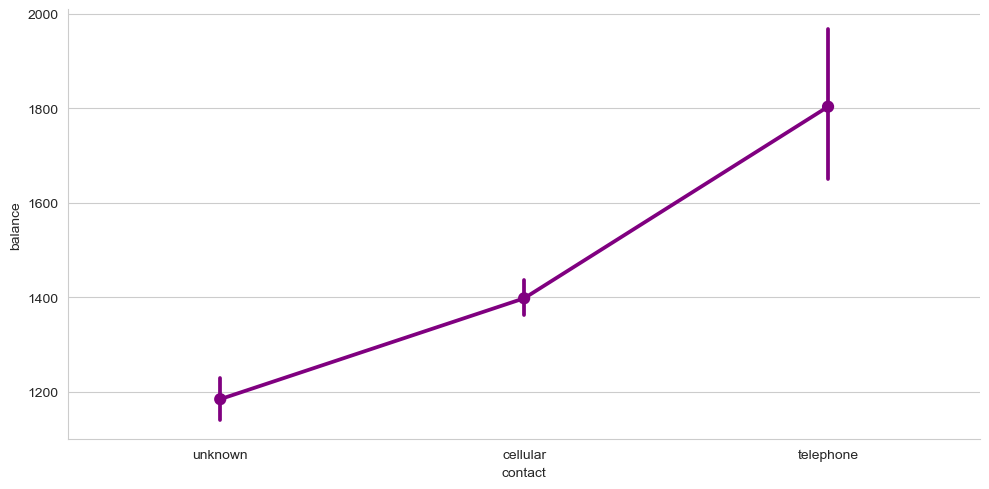

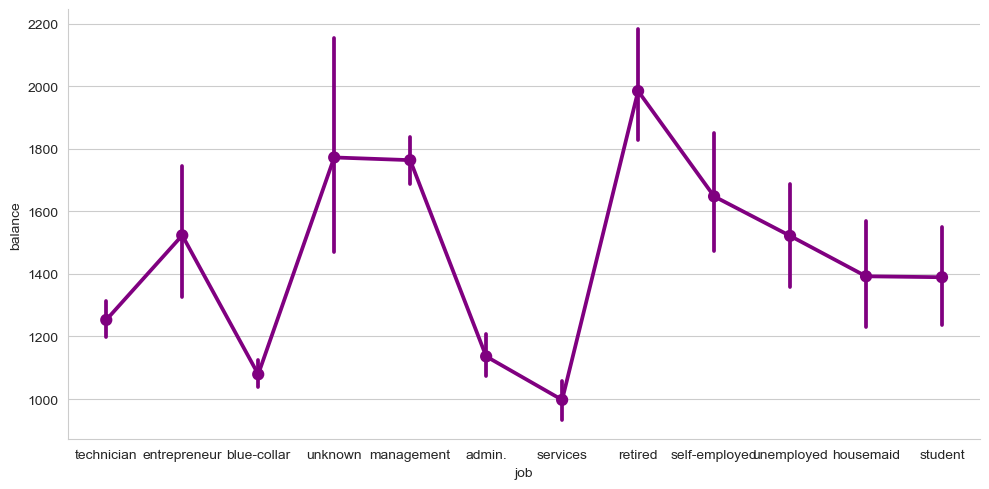

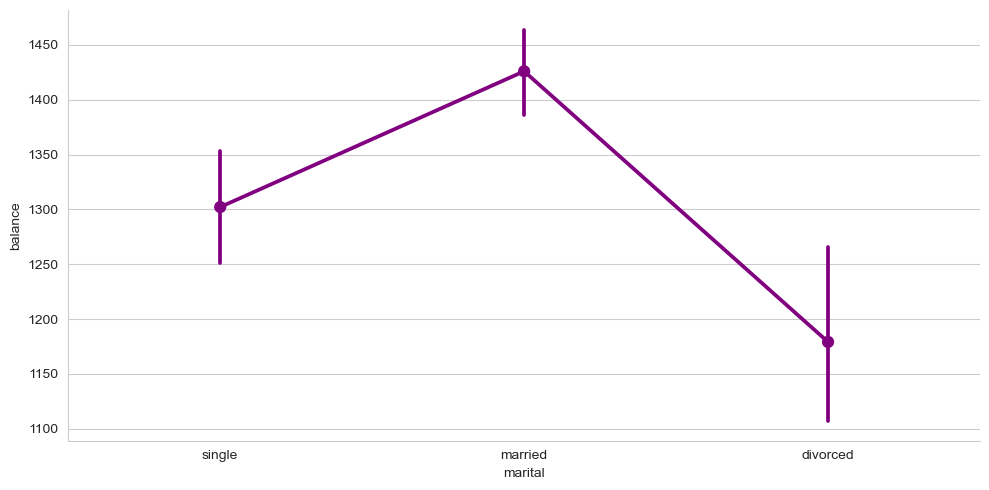

In [18]:
for i,col in enumerate(['contact','job','marital']):
    plt.figure(i)
    sns.catplot(x=col, y='balance', data=df, kind='point', aspect=2, color='purple',)

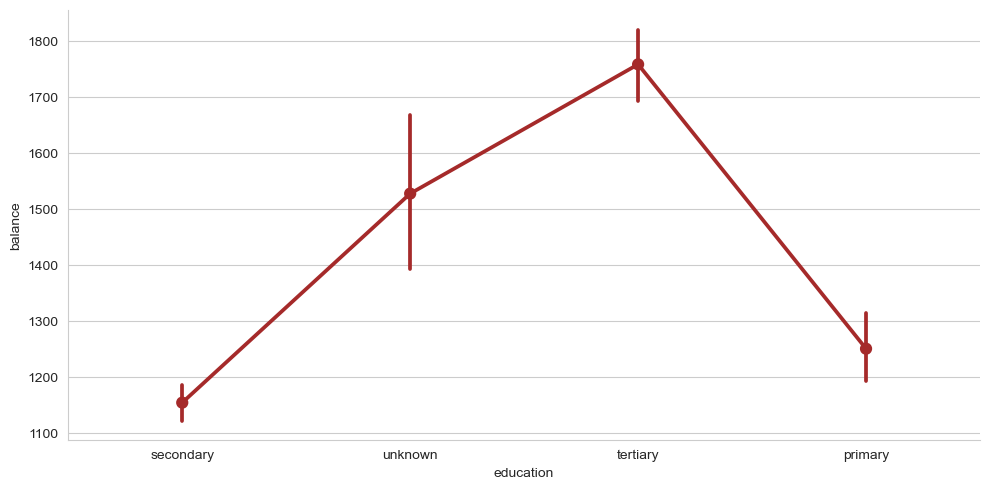

In [19]:
sns.catplot(x='education', y='balance', data=df, kind='point', aspect=2, color='brown',)

# Scatter plot between age and balance

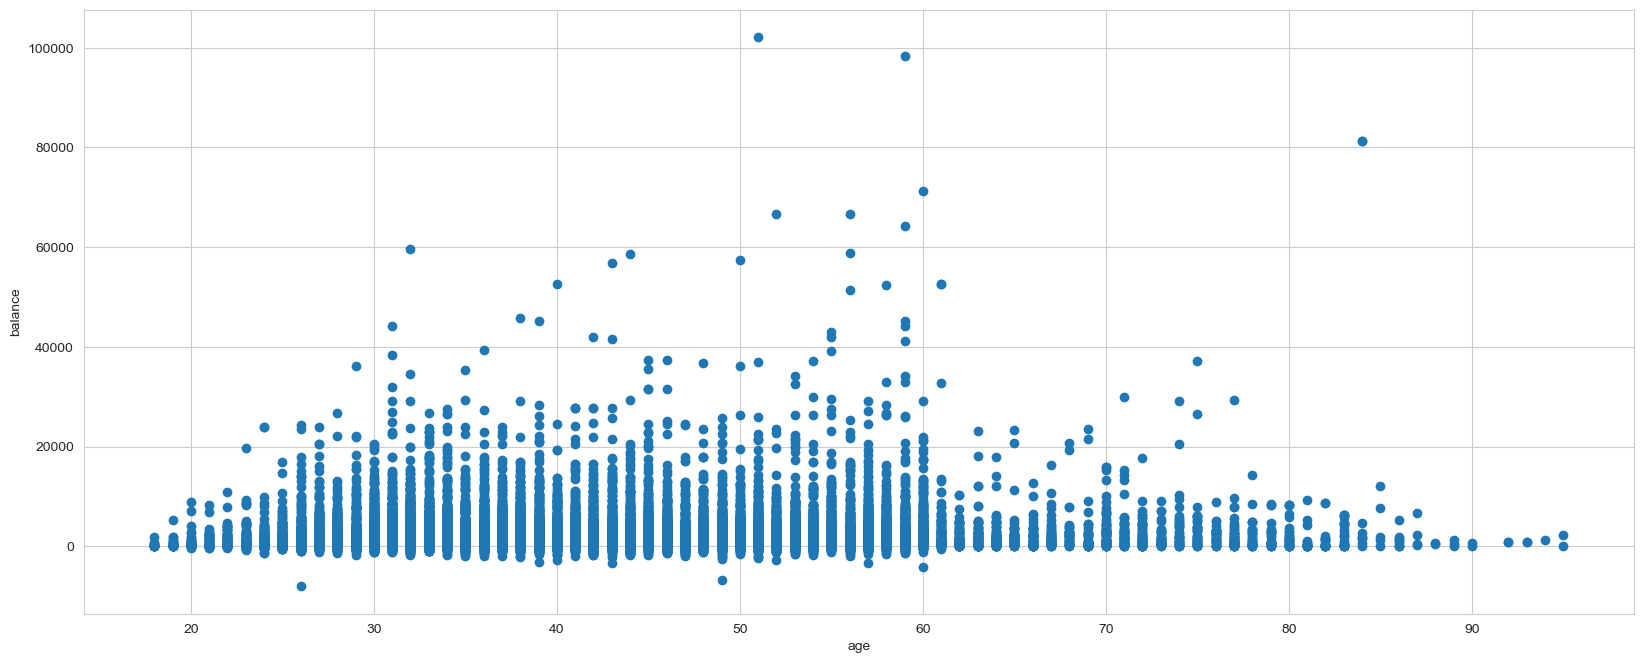

In [20]:
fig,ax=plt.subplots(figsize=(20,8))
ax.scatter(df['age'],df['balance'])
ax.set_ylabel('balance')
ax.set_xlabel('age')
plt.show()

# Scatter plot between between previous and campaign

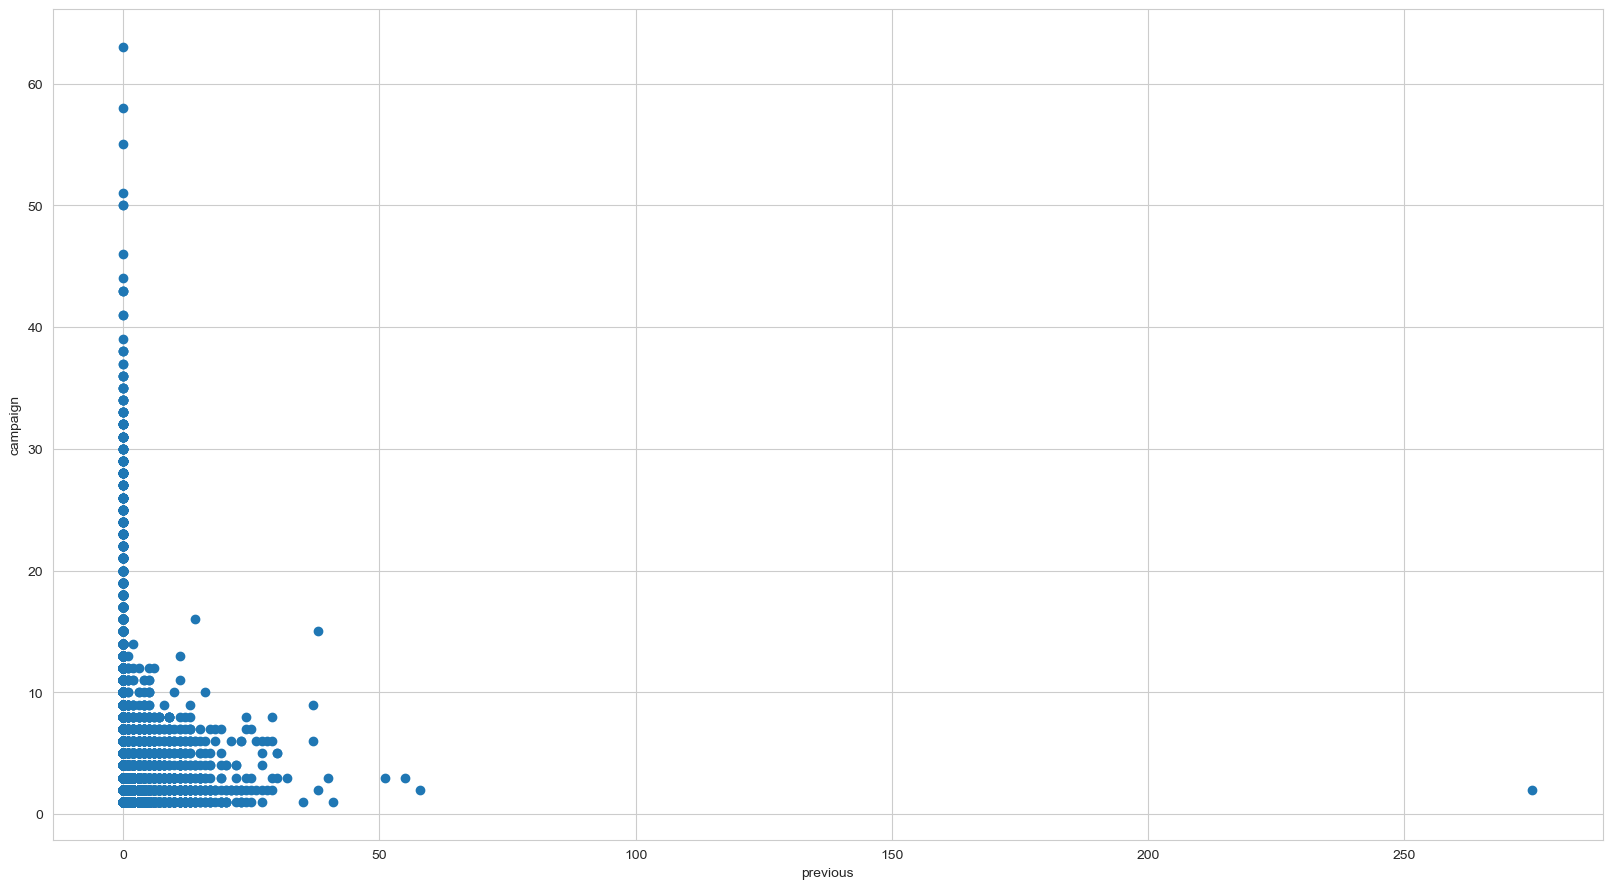

In [21]:
fig,ax=plt.subplots(figsize=(20,11))
ax.scatter(df['previous'],df['campaign'])
ax.set_ylabel('campaign')
ax.set_xlabel('previous')
plt.show()

# Scatter plot between previous and pdays

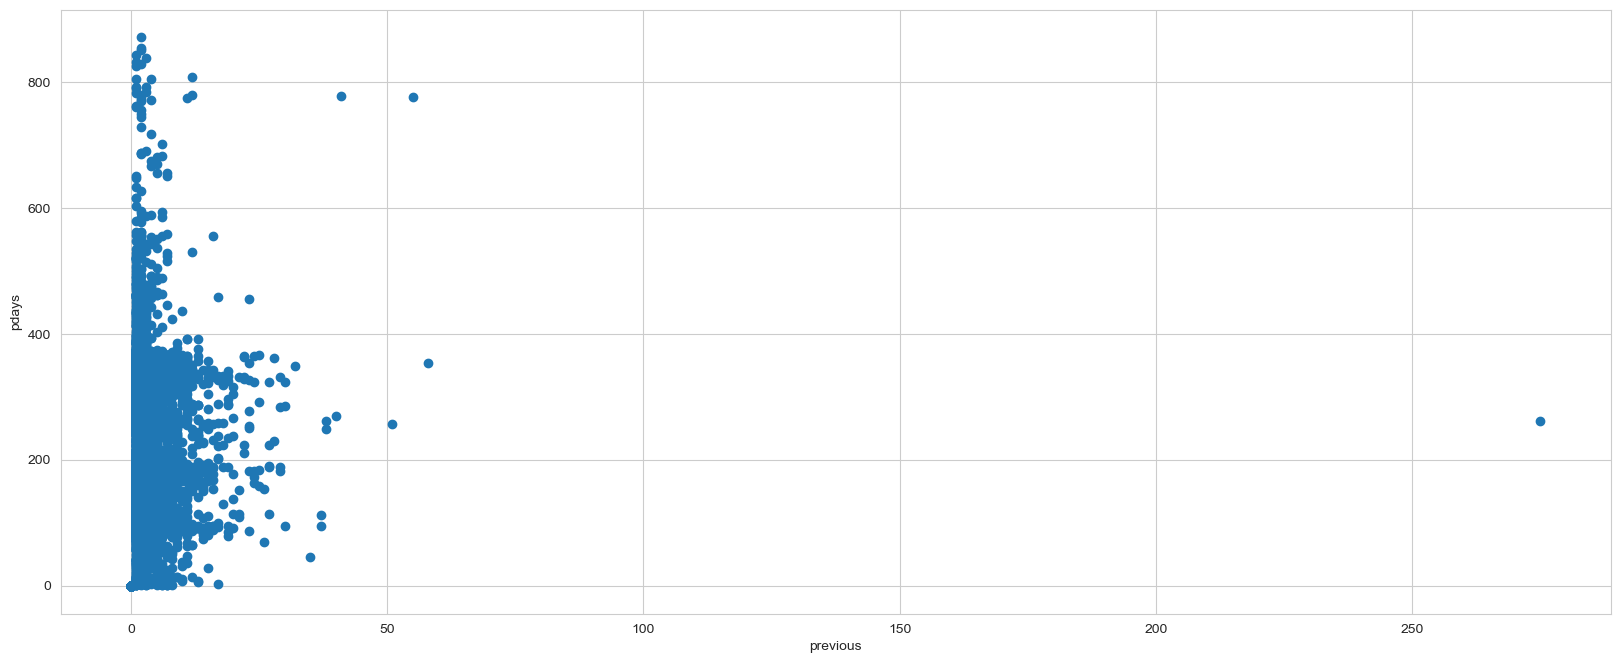

In [22]:
fig,ax=plt.subplots(figsize=(20,8))
ax.scatter(df['previous'],df['pdays'])
ax.set_ylabel('pdays')
ax.set_xlabel('previous')
plt.show()